# Heatmaps Analysis

Heatmaps with and without evolution showing the effect of the landscape connectivity (x-axis) and heterogeneity (y-axis) are plotted for analysis. The reference is always the sceario $\delta_{max}=0$ and $h=0$ (= data[0,0]).

Note: For random geometric graph replicat 1 with 16 patches a correction of one data point was needed, as the maximum number of simulation steps was set too low and the pollinators went extinct after this time.

In [1]:
# load needed packages
import random as rd
import numpy as np
import pandas as pd
from scipy import integrate as integ
from scipy import signal as signal
import spatial_eco_evo_functions_random as fct_rgg
import spatial_eco_evo_functions_grid as fct_grid
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.colors as mcolors

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=-1):
    if n == -1:
        n = cmap.N
    new_cmap = mcolors.LinearSegmentedColormap.from_list(
         'trunc({name},{a:.2f},{b:.2f})'.format(name=cmap.name, a=minval, b=maxval),
         cmap(np.linspace(minval, maxval, n)))
    return new_cmap

In [3]:
blue_seismic = truncate_colormap(plt.cm.seismic, minval=0.0, maxval=0.5)

In [4]:
h_vals = np.arange(0, 2.1, 0.2) # degree of heterogeneity
delta_max_vals = np.arange(0, 1.1, 0.1) # connectivity

## Mean heatmaps random geometric graphs

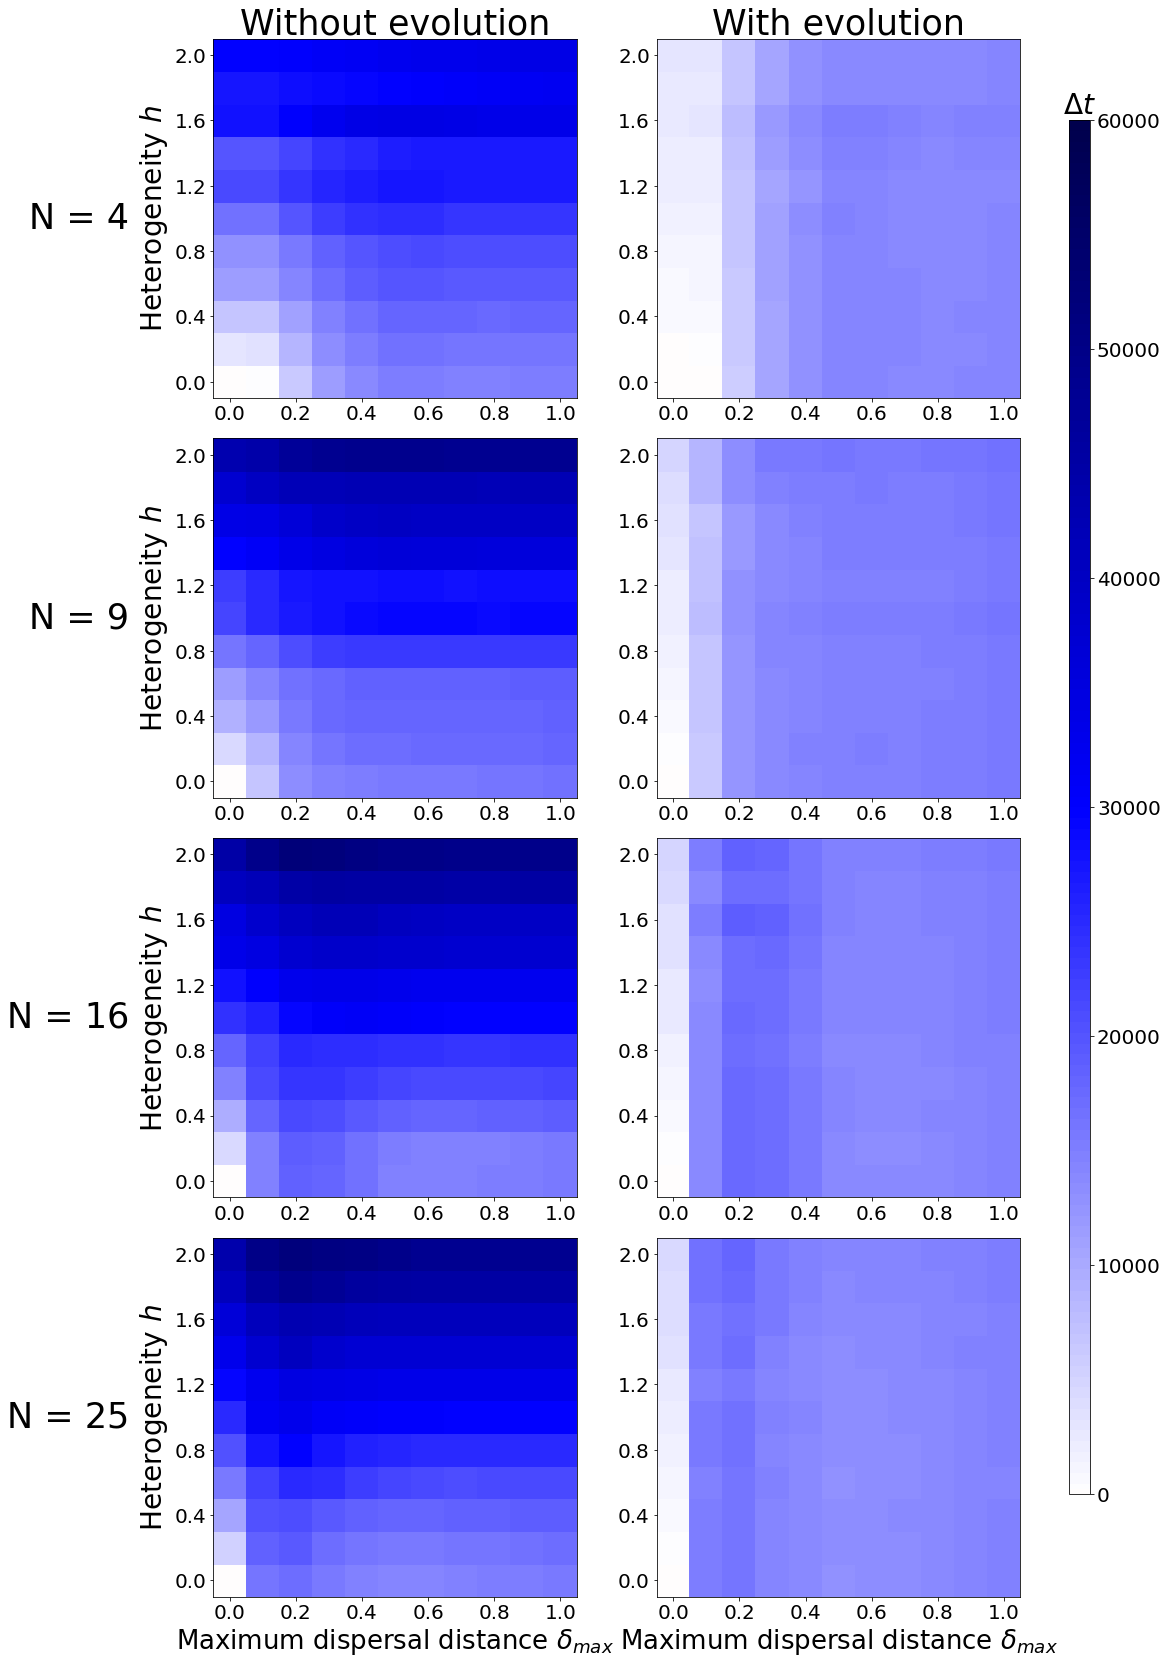

In [5]:
cols = ['{}'.format(col) for col in ['Without evolution', 'With evolution']]
rows = ['N = {}'.format(row) for row in ['4', '9', '16', '25']]

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14.5,23), constrained_layout=True)
pad = 5 # in points

for ax, col in zip(axes[0], cols):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size=35, ha='center', va='baseline')

for ax, row in zip(axes[:,0], rows):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size=35, ha='right', va='center')



n_row = 0
for N in [4, 9, 16, 25]:
    data_list = []
    data_evo_list = []
    
    for rep in range(1,11):
        # load data
        evolution = False
        data = pd.read_csv("Data/random/" + str(rep) + "/N=" + str(N) + "/t_ext, N=" 
                          + str(N) + ",evo=" + str(evolution) + ",lsc=random.csv")
        #######
        if N == 16 and rep == 1:
            data.values[10,2] = 270099
        #######
        data_list.append(data.values)
        
        evolution = True
        data_evo = pd.read_csv("Data/random/" + str(rep) + "/N=" + str(N) + "/t_ext, N=" 
                      + str(N) + ",evo=" + str(evolution) + ",lsc=random.csv")
        data_evo_list.append(data_evo.values)
    
    # calculate mean
    data_mean = mean(data_list, axis=0)
    data_evo_mean = mean(data_evo_list, axis=0)
    
    # 1st column without evolution
    n_col = 0
    im = axes[n_row, n_col].pcolor(delta_max_vals,h_vals,data_mean-data_mean[0,0], vmin=0, vmax=60000, 
                                   cmap=blue_seismic.reversed(), shading='auto')
    if n_row==3:
        axes[n_row, n_col].set_xlabel('Maximum dispersal distance $\delta_{max}$', size=26)
    if n_col==0:
        axes[n_row, n_col].set_ylabel('Heterogeneity $h$', size=28)
    axes[n_row, n_col].set_yticks(np.arange(0, 2.2, 0.4))
    axes[n_row, n_col].tick_params(axis='x', labelsize=20)
    axes[n_row, n_col].tick_params(axis='y', labelsize=20)
    
    # 2nd column with evolution
    n_col = 1
    im = axes[n_row, n_col].pcolor(delta_max_vals,h_vals,data_evo_mean-data_evo_mean[0,0], vmin=0, vmax=60000, 
                                   cmap=blue_seismic.reversed(), shading='auto')
    if n_row==3:
        axes[n_row, n_col].set_xlabel('Maximum dispersal distance $\delta_{max}$', size=26)
    if n_col==0:
        axes[n_row, n_col].set_ylabel('Heterogeneity $h$', size=28)
    axes[n_row, n_col].set_yticks(np.arange(0, 2.2, 0.4))
    axes[n_row, n_col].tick_params(axis='x', labelsize=20)
    axes[n_row, n_col].tick_params(axis='y', labelsize=20)
    
    
    n_row+=1
    
cax = plt.axes([1.02, 0.10, 0.02, 0.83]) #[left, bottom, width, height]
cb=plt.colorbar(im, cax=cax)
cb.ax.set_title(r'$\Delta t$', size=28)
plt.yticks(fontsize= 20)
plt.show()

### One landscape size

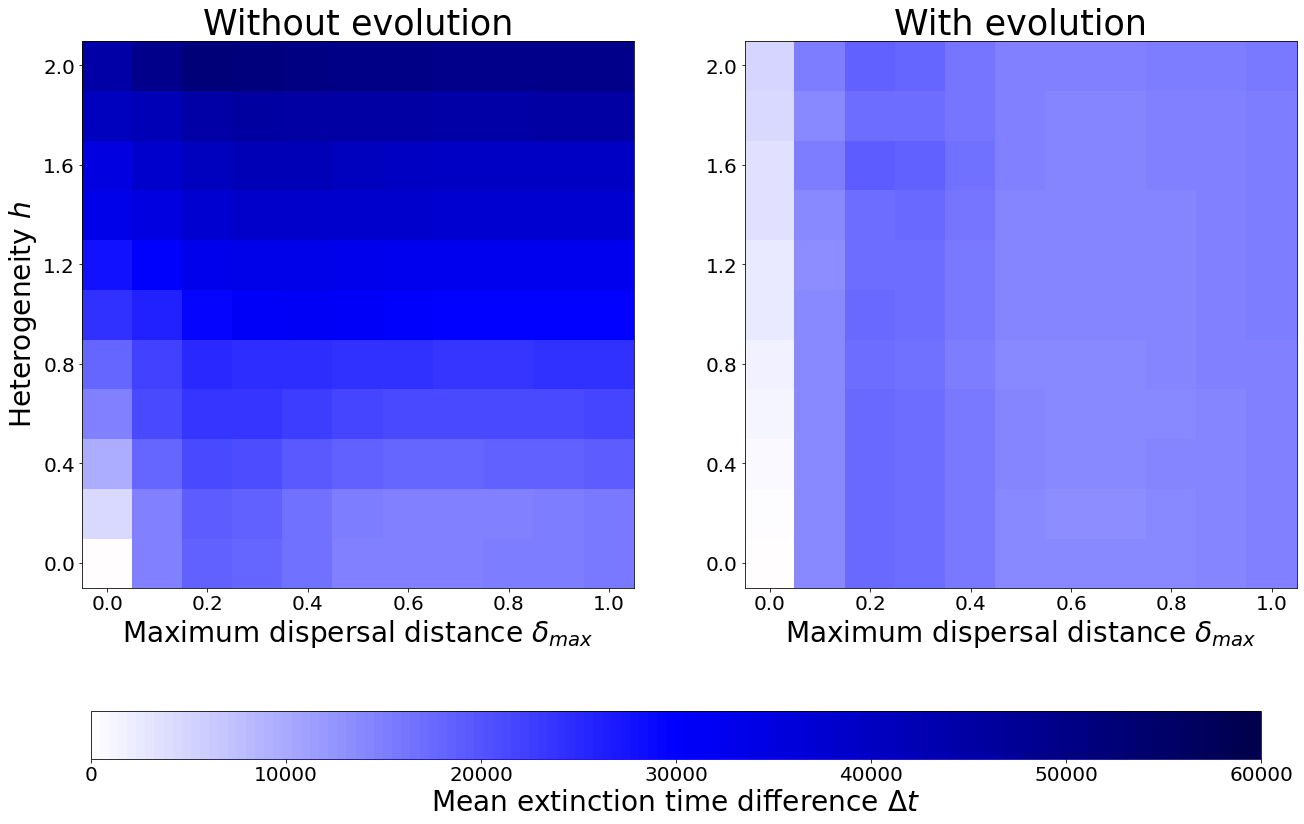

In [6]:
N = 16

plt.figure(figsize=(25,9.5))

data_list = []
data_evo_list = []

for rep in range(1,11):
    # load data
    evolution = False
    data = pd.read_csv("Data/random/" + str(rep) + "/N=" + str(N) + "/t_ext, N=" 
                                  + str(N) + ",evo=" + str(evolution) + ",lsc=random.csv")
    #######
    if N == 16 and rep == 1:
        data.values[10,2] = 270099
    #######
    data_list.append(data.values)

    evolution = True
    data_evo = pd.read_csv("Data/random/" + str(rep) + "/N=" + str(N) + "/t_ext, N=" 
                              + str(N) + ",evo=" + str(evolution) + ",lsc=random.csv")
    data_evo_list.append(data_evo.values)

# calculate mean
data_mean = mean(data_list, axis=0)
data_evo_mean = mean(data_evo_list, axis=0)   


# 1st column without evolution
plt.subplot2grid((1,2), (0,0))
pcolor(delta_max_vals,h_vals,data_mean-data_mean[0,0], vmin=0, vmax=60000, 
                                       cmap=blue_seismic.reversed(), shading='auto')
plt.xlabel('Maximum dispersal distance $\delta_{max}$', size=28)
plt.ylabel('Heterogeneity $h$', size=28)
plt.yticks(np.arange(0, 2.2, 0.4), size=20)
plt.xticks(size=20)
plt.title("Without evolution", size=35)



# 2nd column with evolution
plt.subplot2grid((1,2), (0,1))
pcolor(delta_max_vals,h_vals,data_evo_mean-data_evo_mean[0,0], vmin=0, vmax=60000, 
                                       cmap=blue_seismic.reversed(), shading='auto')
plt.xlabel('Maximum dispersal distance $\delta_{max}$', size=28)
plt.yticks(np.arange(0, 2.2, 0.4), size=20)
plt.xticks(size=20)
plt.title("With evolution", size=35)


plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.13, -0.15, 0.65, 0.07]) #[left, bottom, width, height]
cb = plt.colorbar(cax=cax, orientation='horizontal')
cb.set_label(r'Mean extinction time difference $\Delta t$', size=28)
plt.xticks(fontsize= 20)

plt.show()

## Mean heatmaps regular grid

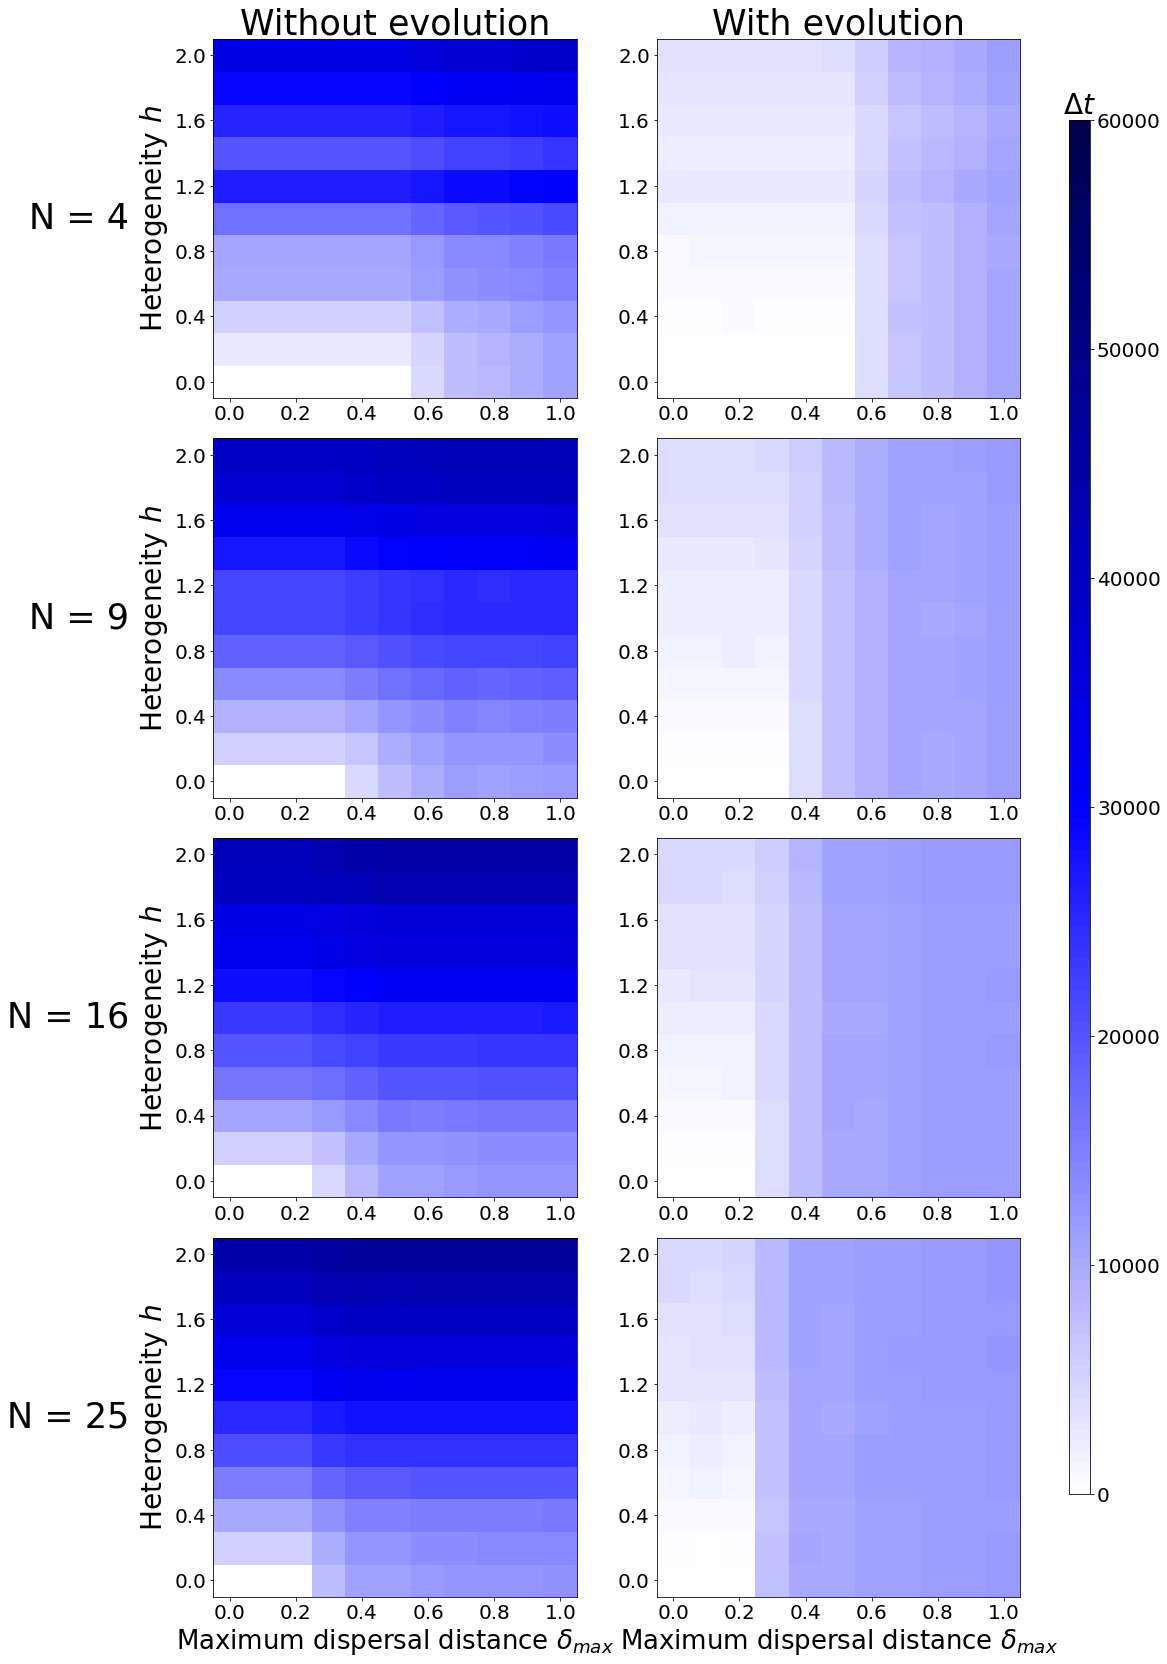

In [7]:
cols = ['{}'.format(col) for col in ['Without evolution', 'With evolution']]
rows = ['N = {}'.format(row) for row in ['4', '9', '16', '25']]

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14.5,23), constrained_layout=True)
pad = 5 # in points

for ax, col in zip(axes[0], cols):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size=35, ha='center', va='baseline')

for ax, row in zip(axes[:,0], rows):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size=35, ha='right', va='center')



n_row = 0
for N in [4, 9, 16, 25]:
    data_list = []
    data_evo_list = []
    
    for rep in range(1,11):
        # load data
        evolution = False
        data = pd.read_csv("Data/grid/" + str(rep) + "/N=" + str(N) + "/t_ext, N=" 
                          + str(N) + ",evo=" + str(evolution) + ",lsc=grid.csv")
        data_list.append(data.values)
        
        evolution = True
        data_evo = pd.read_csv("Data/grid/" + str(rep) + "/N=" + str(N) + "/t_ext, N=" 
                      + str(N) + ",evo=" + str(evolution) + ",lsc=grid.csv")
        data_evo_list.append(data_evo.values)
    
    # calculate mean
    data_mean = mean(data_list, axis=0)
    data_evo_mean = mean(data_evo_list, axis=0)
    
    # 1st column without evolution
    n_col = 0
    im = axes[n_row, n_col].pcolor(delta_max_vals,h_vals,data_mean-data_mean[0,0], vmin=0, vmax=60000, 
                                   cmap=blue_seismic.reversed(), shading='auto')
    if n_row==3:
        axes[n_row, n_col].set_xlabel('Maximum dispersal distance $\delta_{max}$', size=26)
    if n_col==0:
        axes[n_row, n_col].set_ylabel('Heterogeneity $h$', size=28)
    axes[n_row, n_col].set_yticks(np.arange(0, 2.2, 0.4))
    axes[n_row, n_col].tick_params(axis='x', labelsize=20)
    axes[n_row, n_col].tick_params(axis='y', labelsize=20)
    
    # 2nd column with evolution
    n_col = 1
    im = axes[n_row, n_col].pcolor(delta_max_vals,h_vals,data_evo_mean-data_evo_mean[0,0], vmin=0, vmax=60000, 
                                   cmap=blue_seismic.reversed(), shading='auto')
    if n_row==3:
        axes[n_row, n_col].set_xlabel('Maximum dispersal distance $\delta_{max}$', size=26)
    if n_col==0:
        axes[n_row, n_col].set_ylabel('Heterogeneity $h$', size=28)
    axes[n_row, n_col].set_yticks(np.arange(0, 2.2, 0.4))
    axes[n_row, n_col].tick_params(axis='x', labelsize=20)
    axes[n_row, n_col].tick_params(axis='y', labelsize=20)
    
    
    n_row+=1
    

cax = plt.axes([1.02, 0.10, 0.02, 0.83]) #[left, bottom, width, height]
cb=plt.colorbar(im, cax=cax)
cb.ax.set_title(r'$\Delta t$', size=28)
plt.yticks(fontsize= 20)
plt.show()

## Single landscapes

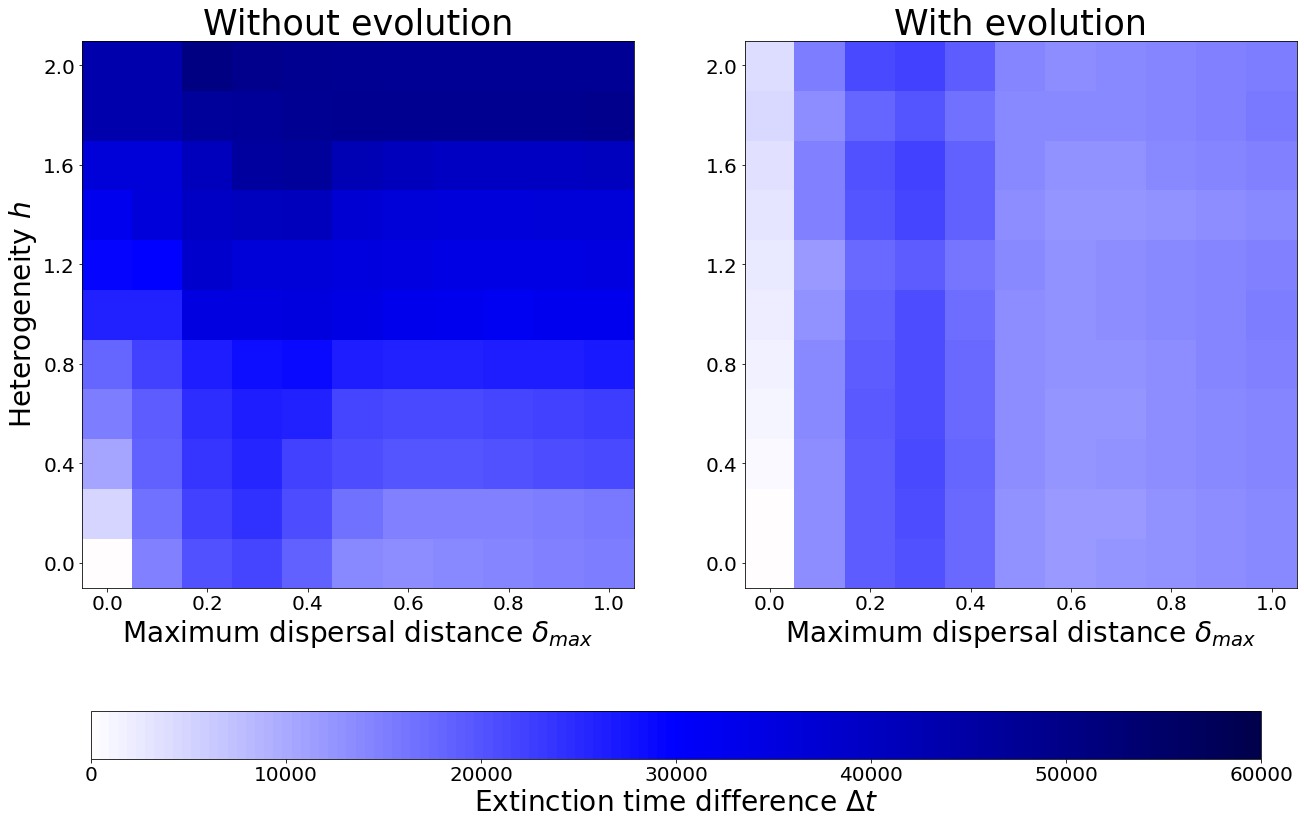

In [8]:
N = 16
rep = 7

evolution = False
data = pd.read_csv("Data/random/" + str(rep) + "/N=" + str(N) + "/t_ext, N=" 
                              + str(N) + ",evo=" + str(evolution) + ",lsc=random.csv")
data=data.values

evolution = True
data_evo = pd.read_csv("Data/random/" + str(rep) + "/N=" + str(N) + "/t_ext, N=" 
                          + str(N) + ",evo=" + str(evolution) + ",lsc=random.csv")
data_evo=data_evo.values


plt.figure(figsize=(25,9.5))

# 1st column without evolution
plt.subplot2grid((1,2), (0,0))
pcolor(delta_max_vals,h_vals,data-data[0,0], vmin=0, vmax=60000, 
                                       cmap=blue_seismic.reversed(), shading='auto')
plt.xlabel('Maximum dispersal distance $\delta_{max}$', size=28)
plt.ylabel('Heterogeneity $h$', size=28)
plt.yticks(np.arange(0, 2.2, 0.4), size=20)
plt.xticks(size=20)
plt.title("Without evolution", size=35)



# 2nd column with evolution
plt.subplot2grid((1,2), (0,1))
pcolor(delta_max_vals,h_vals,data_evo-data_evo[0,0], vmin=0, vmax=60000, 
                                       cmap=blue_seismic.reversed(), shading='auto')
plt.xlabel('Maximum dispersal distance $\delta_{max}$', size=28)
plt.yticks(np.arange(0, 2.2, 0.4), size=20)
plt.xticks(size=20)
plt.title("With evolution", size=35)


plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.13, -0.15, 0.65, 0.07]) #[left, bottom, width, height]
cb = plt.colorbar(cax=cax, orientation='horizontal')
cb.set_label(r'Extinction time difference $\Delta t$', size=28)
plt.xticks(fontsize= 20)

plt.show()

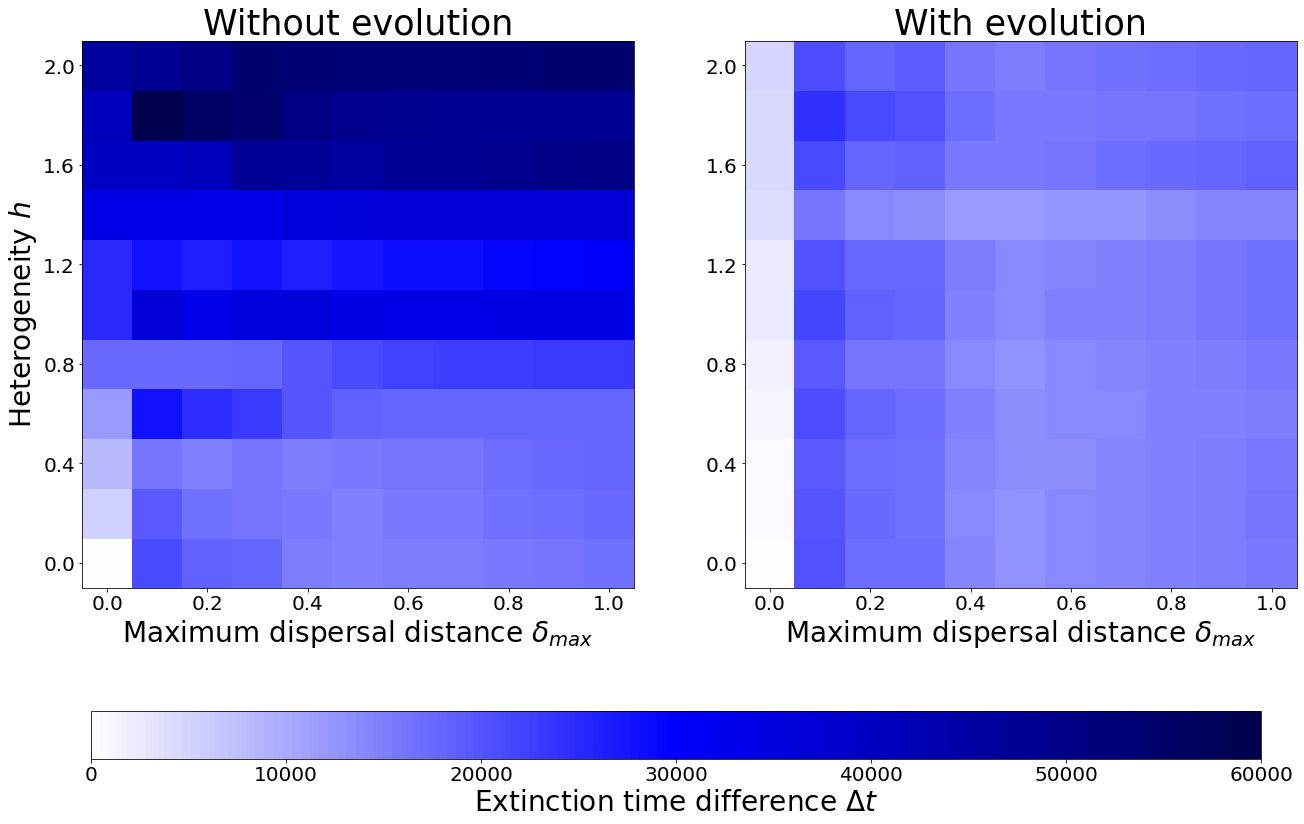

In [9]:
N = 9
rep = 5

evolution = False
data = pd.read_csv("Data/random/" + str(rep) + "/N=" + str(N) + "/t_ext, N=" 
                              + str(N) + ",evo=" + str(evolution) + ",lsc=random.csv")
data=data.values

evolution = True
data_evo = pd.read_csv("Data/random/" + str(rep) + "/N=" + str(N) + "/t_ext, N=" 
                          + str(N) + ",evo=" + str(evolution) + ",lsc=random.csv")
data_evo=data_evo.values


plt.figure(figsize=(25,9.5))

# 1st column without evolution
plt.subplot2grid((1,2), (0,0))
pcolor(delta_max_vals,h_vals,data-data[0,0], vmin=0, vmax=60000, 
                                       cmap=blue_seismic.reversed(), shading='auto')
plt.xlabel('Maximum dispersal distance $\delta_{max}$', size=28)
plt.ylabel('Heterogeneity $h$', size=28)
plt.yticks(np.arange(0, 2.2, 0.4), size=20)
plt.xticks(size=20)
plt.title("Without evolution", size=35)



# 2nd column with evolution
plt.subplot2grid((1,2), (0,1))
pcolor(delta_max_vals,h_vals,data_evo-data_evo[0,0], vmin=0, vmax=60000, 
                                       cmap=blue_seismic.reversed(), shading='auto')
plt.xlabel('Maximum dispersal distance $\delta_{max}$', size=28)
#plt.ylabel('Heterogeneity $h$', size=28)
plt.yticks(np.arange(0, 2.2, 0.4), size=20)
plt.xticks(size=20)
plt.title("With evolution", size=35)


plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.13, -0.15, 0.65, 0.07]) #[left, bottom, width, height]
cb = plt.colorbar(cax=cax, orientation='horizontal')
cb.set_label(r'Extinction time difference $\Delta t$', size=28)
plt.xticks(fontsize= 20)

plt.show()